<a href="https://colab.research.google.com/github/SriNithin965/project-4-2/blob/main/code/XGBOOST_FUTURE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas==1.2.0
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 6.3 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 4.5 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_excel('https://github.com/SriNithin965/project-4-2/raw/main/data/Sample-Superstore.xls')

In [4]:
data1 = data[['Ship Date','Sales']]
data1 = data1.groupby('Ship Date').sum()
data1 = data1.resample('MS').median()
data1.head(10)

,Sales
Ship Date,
2014-01-01,149.950
2014-02-01,112.411
2014-03-01,483.546
2014-04-01,680.252
2014-05-01,504.828
2014-06-01,656.066
2014-07-01,504.586
2014-08-01,884.666
2014-09-01,947.648


In [5]:
num = data1.values

In [ ]:
num1 = num/min(num)
num1

In [7]:
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [8]:
n_steps = 3
# split into samples
X, y = prepare_data(num1, n_steps)

In [ ]:
print(X),print(y)

In [10]:
X = X.reshape((X.shape[0], X.shape[1]))
y = y.reshape(y.shape[0])

In [11]:
import xgboost as xg
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 100, seed = 123)

In [12]:
xgb_r.fit(X, y)

[13:15:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(seed=123)

In [13]:
y_pred = xgb_r.predict(X)

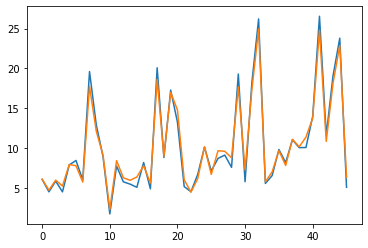

In [22]:
plt.plot(y)
plt.plot(y_pred)
plt.show()

In [ ]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE 
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, })
forecast_accuracy(y_pred,y)

In [15]:
l = []
for i in num1[-3:]:
  for j in i:
    l.append(j)

In [16]:
l

[19.039444538345894, 23.793685671331094, 5.064219693802208]

In [ ]:
x_input = np.array(l)
temp_input=list(x_input)
lst_output=[]
i=0
while(i<20):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape(1,3)
        #print(x_input)
        yhat = xgb_r.predict(x_input)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0])
        i=i+1
    else:
        x_input = x_input.reshape(1,3)
        yhat = xgb_r.predict(x_input)
        print(yhat[0])
        temp_input.append(yhat[0])
        lst_output.append(yhat[0])
        i=i+1
    

print(lst_output)

In [32]:
day_new=np.arange(1,50)
day_pred=np.arange(1,69)

In [45]:
l2 = []
for i in y_pred:
  l2.append(i)
print(l2)

[6.087861, 4.702067, 5.9602304, 5.21722, 7.915592, 7.774254, 5.7204027, 17.715523, 12.118702, 9.082234, 2.270389, 8.417998, 6.2606616, 5.9412074, 6.359717, 7.7591677, 5.6020236, 18.612713, 8.953306, 16.982737, 14.775322, 6.0134473, 4.452443, 6.163789, 10.156446, 6.683559, 9.651969, 9.579707, 8.773639, 17.65734, 7.2329125, 17.263914, 24.93476, 5.7651825, 6.9930544, 9.665568, 7.8029943, 11.091879, 10.147011, 11.358931, 13.766332, 24.76202, 10.828839, 18.131838, 22.869198, 6.3122296]


In [46]:
for i in lst_output:
  l2.append(i)

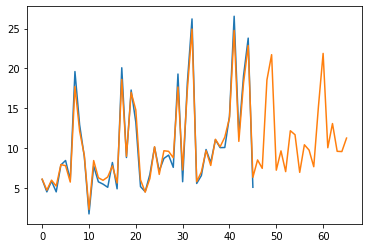

In [47]:
import matplotlib.pyplot as plt
plt.plot(y)
plt.plot(l2)
plt.show()

In [48]:
date = pd.date_range(start='2018-02-01',end='2019-09-01', freq='MS')
lst_output_data = lst_output*min(num)

In [49]:
data3 = pd.DataFrame(date,lst_output*min(num))
data3

,0
955.103279,2018-02-01
836.692958,2018-03-01
2084.597467,2018-04-01
2441.195061,2018-05-01
810.773300,2018-06-01
1083.256146,2018-07-01
790.280871,2018-08-01
1367.486886,2018-09-01
1310.960633,2018-10-01
779.941899,2018-11-01
